In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. 데이터 둘러 보기

In [2]:
df = pd.read_csv('trip.csv')

In [3]:
df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
df.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


In [5]:
df.shape

(22701, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [8]:
df.describe(include='object')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method
count,22701,22701,22701,22701
unique,20030,22687,22688,3
top,Michael Smith,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,Cash
freq,16,2,2,11196


## = 데이터 둘러보기 결과 =
- 행: 22,701개, 컬럼: 9개
- fare_amoutn에 결측치가 있음
- pickup과 dropoff time의 Dtype 확인 필요
- 날짜 Dtype 변경 필요
- passenger_count, trip_distance, fare_amont에 이상치 확인 필요
- 문자열 확인 필요

# 2. 결측치 검토
- fare_amount에 3개의 결측치가 있으나 0.000132의 낮은 비율로 제거함

In [9]:
df.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [10]:
df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [11]:
df.dropna(subset=['fare_amount'], inplace=True)

In [12]:
df.shape

(22698, 9)

In [13]:
df.isna().any()

passenger_name           False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
payment_method           False
passenger_count          False
trip_distance            False
fare_amount              False
tip_amount               False
tolls_amount             False
dtype: bool

# 3. 이상치 검토

### 3.1 passenger_count 검토
- 택시는 운전기사 포함 총 5명 탑승으로 간주하여 최대 승객은 4명
- 4명 이상의 승객은 이상치로 간주
- 주행거리, 주행시간, 요금의 상관관계 분석이 목적이므로 이상치를 제거하지 않고 중간값으로 대체함

In [14]:
df['passenger_count'].value_counts(ascending=False)

1     16117
2      3305
5      1143
3       952
6       692
4       455
0        33
36        1
Name: passenger_count, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

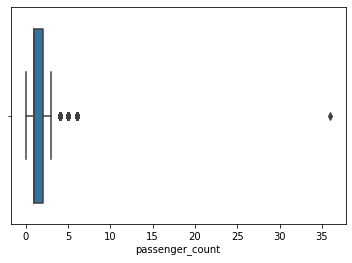

In [15]:
sns.boxplot(df['passenger_count'])

In [16]:
passenger_count_median = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].apply(lambda x: passenger_count_median if x > 4 else x)

In [17]:
df['passenger_count'].value_counts(ascending=False)

1.0    17953
2.0     3305
3.0      952
4.0      455
0.0       33
Name: passenger_count, dtype: int64

### 3.2 fare_amount 검토
- fare_amount가 0보다 작은 행은 총 20개로 전체 데이터 개수에 비해 작아 삭제
- 30 이상의 trip_distance의 개수와 fare_amount를 비교한 결과, fare_amount가 400, 999.99는 이상치로 제거

In [18]:
df['fare_amount'].value_counts(ascending=False)

6.00      1163
6.50      1089
5.50      1081
7.00      1067
7.50      1018
          ... 
999.99       1
65.00        1
150.00       1
131.00       1
16.80        1
Name: fare_amount, Length: 185, dtype: int64

In [19]:
df[df['fare_amount'] <= 0].shape

(20, 9)

In [20]:
df = df[df['fare_amount'] > 0]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

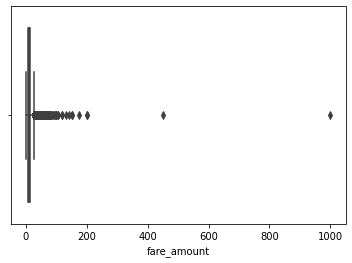

In [21]:
sns.boxplot(df['fare_amount'])

In [22]:
df['fare_amount'].sort_values(ascending=False)

8478     999.99
20314    450.00
13863    200.01
15476    200.00
12513    175.00
          ...  
3564       2.50
7151       2.50
13972      1.00
14285      0.01
4063       0.01
Name: fare_amount, Length: 22678, dtype: float64

In [23]:
df['trip_distance'].sort_values(ascending=False)

9282     33.96
13863    33.92
6066     32.72
10293    31.95
30       30.83
         ...  
7154      0.00
19867     0.00
16396     0.00
15086     0.00
2819      0.00
Name: trip_distance, Length: 22678, dtype: float64

In [24]:
df = df[df['fare_amount'] < 400]

In [25]:
df['fare_amount'].sort_values()

14285      0.01
4063       0.01
13972      1.00
18699      2.50
14064      2.50
          ...  
9282     150.00
3584     152.00
12513    175.00
15476    200.00
13863    200.01
Name: fare_amount, Length: 22676, dtype: float64

### 3. trip_distance 검토
- 거리가 0 이하 제거

In [26]:
df[df['trip_distance'] <= 0].shape

(143, 9)

In [27]:
df = df[df['trip_distance'] > 0]

In [28]:
df[df['trip_distance'] <= 0].shape

(0, 9)

# 4. 중복값 검토

In [29]:
df.duplicated().sum()

2

In [30]:
df = df.drop_duplicates()

In [31]:
df.shape

(22531, 9)

# 5. 컬럼명 변경

In [32]:
df.rename({'tpep_pickup_datetime': 'pickup_time', 'tpep_dropoff_datetime': 'drop_time'}, axis=1, inplace=True)

In [33]:
df.head(1)

,passenger_name,pickup_time,drop_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,1.0,3.34,13.0,2.76,0.0


# 6. payment_metod
- Credit Card와 Debit Card를 Card로 변경
- None 값 제거

In [34]:
df['payment_method'].value_counts()

Cash           11110
Debit Card      5740
Credit Card     5681
Name: payment_method, dtype: int64

In [35]:
df['payment_method'] = df['payment_method'].str.split(expand=True)[0].apply(lambda x: 'Card' if x == 'Debit' or x == 'Credit' else x)       

In [36]:
df['payment_method'].value_counts()

Card    11421
Cash    11110
Name: payment_method, dtype: int64

# 7. pickup_time과 drop_time의 타입 변경

In [38]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['drop_time'] = pd.to_datetime(df['drop_time'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   passenger_name   22531 non-null  object        
 1   pickup_time      22531 non-null  datetime64[ns]
 2   drop_time        22531 non-null  datetime64[ns]
 3   payment_method   22531 non-null  object        
 4   passenger_count  22531 non-null  float64       
 5   trip_distance    22531 non-null  float64       
 6   fare_amount      22531 non-null  float64       
 7   tip_amount       22531 non-null  float64       
 8   tolls_amount     22531 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(2)
memory usage: 1.7+ MB


# 8. 주행시간 계산
- driving_minutes 컬럼 추가

In [44]:
df['driving_minutes'] = (df['drop_time'] - df['pickup_time']).dt.total_seconds() / 60

In [46]:
df.head()

,passenger_name,pickup_time,drop_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,1.0,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1.0,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1.0,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1.0,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1.0,4.37,16.5,0.00,0.0,16.716667


# 9. 주행시간, 주행거리, 요금의 상관관계

In [47]:
df['total_fare'] = df['fare_amount'] + df['tolls_amount']

In [50]:
correlation_matrix = df[['driving_minutes', 'trip_distance', 'total_fare']].corr()
correlation_matrix

,driving_minutes,trip_distance,total_fare
driving_minutes,1.000000,0.154727,0.170897
trip_distance,0.154727,1.000000,0.938023
total_fare,0.170897,0.938023,1.000000


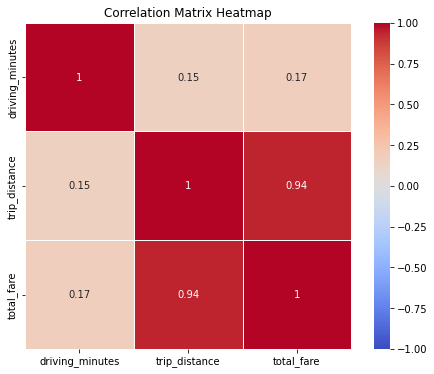

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()